## LAPTOP PRICE PREDICTION

### Work Flow

1. Data Exploration
2. Data Cleaning and Tranformation
3. Top Correlated Features
4. Choose and Train the Model
5. Make a Prediction
6. Evaluate the model
8. Plot the Data
8. Save the model
7. Feature Importance and Tuning

## 1. Data Exploration

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import data into a dataframe
df = pd.read_csv("data/laptop_price.csv", encoding="latin-1")

In [3]:
# Explore the data
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# Check key metrics
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [5]:
# Check count of products
df.Product.value_counts()

XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: Product, Length: 618, dtype: int64

## 2. Data Cleaning and Transformation 
#### Cleaning and Tranformations include:
 - ScreenResolution: 
     - Remove all text except screen width and height, 
     - Split width and height into seperate columns "screen_width", "screen_height"
 - Cpu: 
     - Remove all text except the make e.g "intel" and speed (GHz) value e.g 2.3 
     - Split into 2 columns "cpu_make", "cpu_speed"
 - Ram:
     - Remove gigabyte and Terabyte text (GB, TB) and 
     - Convert all values to Megabytes
 - Memory:
     - Remove GB and 
     - Split into 2 columns "memory size" e.g 128 and "memory type" e.g SSD
 - Gpu: 
     - Remove all text except the make e.g "intel", "AMD"
 - Weight:
     - Remove "kg" or any measurement text
 - Modify columns datatypes
 - Convert string columns to numbers:
     - Drop columns with too many distinct values
     - one hot encode columns

#### ScreenResolution Transformation

In [6]:
# Get only width and height
df["ScreenResolution"] = df["ScreenResolution"].str.split(" ").str.get(-1)

# Split into width and height 
df["ScreenResolution_width"] = df["ScreenResolution"].str.split("x").str.get(0)
df["ScreenResolution_height"] = df["ScreenResolution"].str.split("x").str.get(1)

In [7]:
# Drop original column
df = df.drop("ScreenResolution", axis = 1)

In [8]:
# Check that column is dropped and split
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenResolution_width,ScreenResolution_height
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080


In [9]:
# Shorten the column names
df.rename (columns= {"ScreenResolution_width": "ScreenRes_Width", "ScreenResolution_height":"ScreenRes_Height"}, inplace=True)

#### Cpu Transformation

In [10]:
# Using lambda function to split column
df["Cpu_Make"] = df["Cpu"].str.split(" ").apply(lambda x: x[0])
df["Cpu_Speed"] = df["Cpu"].str.split(" ").apply(lambda x: x[-1][:-3])

In [11]:
# Drop original column
df = df.drop("Cpu", axis = 1)

In [12]:
# Check that column is dropped and split
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenRes_Width,ScreenRes_Height,Cpu_Make,Cpu_Speed
0,1,Apple,MacBook Pro,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,Intel,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,Intel,1.8
2,3,HP,250 G6,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Intel,2.5


#### Ram Transformation

In [13]:
# Remove the two last string values
df["Ram"] = df["Ram"].str[:-2]

In [14]:
# Check that string values are removed
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenRes_Width,ScreenRes_Height,Cpu_Make,Cpu_Speed
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,Intel,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,Intel,1.8
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Intel,2.5


####  Memory Transformation

In [15]:
# Using lambda function to split column
df["Memory_Size"] = df["Memory"].str.split(" ").apply(lambda x: x[0])
df["Memory_Type"] = df["Memory"].str.split(" ").apply(lambda x: x[1])

In [16]:
# Drop original column
df = df.drop("Memory", axis=1)

In [17]:
# Check that column is dropped and split
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,ScreenRes_Width,ScreenRes_Height,Cpu_Make,Cpu_Speed,Memory_Size,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,Intel,2.3,128GB,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,Intel,1.8,128GB,Flash
2,3,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Intel,2.5,256GB,SSD


In [18]:
# Remove string values and convert all values to Megabytes

# Check for size types
df.Memory_Size.value_counts()

256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: Memory_Size, dtype: int64

Memory_Size has both GB and TB

In [19]:
# Create a function to remove GB anda TB from Memory Size and convert all values to float in Megabytes

# find the position of GB and TB and slice it off, then convert values to float and then to megabytes
def ConverttoMB(n):
    if "GB" in n:
        return float(n[:n.find("GB")])*1000
    elif "TB" in n:
        return float(n[:n.find("TB")])*1000

In [20]:
# Apply function to Memory Size
df["Memory_Size"] = df["Memory_Size"].apply(ConverttoMB)

In [21]:
# Rename column
df = df.rename (columns = {"Memory_Size": "Memory_Size(MB)"})

In [22]:
# Check that transformation is done
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,ScreenRes_Width,ScreenRes_Height,Cpu_Make,Cpu_Speed,Memory_Size(MB),Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,Intel,2.3,128000.0,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,Intel,1.8,128000.0,Flash
2,3,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Intel,2.5,256000.0,SSD


#### Gpu Transformation

In [23]:
# Using get method to split column
df["Gpu_Type"] = df["Gpu"].str.split(" ").str.get(0)

In [24]:
# Drop original column
df = df.drop("Gpu", axis=1)

In [25]:
# Check that column is dropped and split
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,ScreenRes_Width,ScreenRes_Height,Cpu_Make,Cpu_Speed,Memory_Size(MB),Memory_Type,Gpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37kg,1339.69,2560,1600,Intel,2.3,128000.0,SSD,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34kg,898.94,1440,900,Intel,1.8,128000.0,Flash,Intel
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86kg,575.00,1920,1080,Intel,2.5,256000.0,SSD,Intel


#### Weight Transformation

In [26]:
# Remove kg or measurement values - the last 2 strings
df["Weight"] = df["Weight"].str[:-2]

In [27]:
# Check that transformation is done
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,ScreenRes_Width,ScreenRes_Height,Cpu_Make,Cpu_Speed,Memory_Size(MB),Memory_Type,Gpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,2560,1600,Intel,2.3,128000.0,SSD,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,1440,900,Intel,1.8,128000.0,Flash,Intel
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,1920,1080,Intel,2.5,256000.0,SSD,Intel


#### Modify Columns Datatypes

In [28]:
# Check current data types
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
Ram                  object
OpSys                object
Weight               object
Price_euros         float64
ScreenRes_Width      object
ScreenRes_Height     object
Cpu_Make             object
Cpu_Speed            object
Memory_Size(MB)     float64
Memory_Type          object
Gpu_Type             object
dtype: object

In [29]:
# Convert string values to integers and floats
df["Ram"] = df["Ram"].astype('int')
df["Weight"] = df["Weight"].astype("float")
df["ScreenRes_Width"] = df["ScreenRes_Width"].astype("int")
df["ScreenRes_Height"] = df["ScreenRes_Height"].astype("int")
df["Cpu_Speed"] = df["Cpu_Speed"].astype("float")

In [30]:
# Recheck datatypes
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
Ram                   int32
OpSys                object
Weight              float64
Price_euros         float64
ScreenRes_Width       int32
ScreenRes_Height      int32
Cpu_Make             object
Cpu_Speed           float64
Memory_Size(MB)     float64
Memory_Type          object
Gpu_Type             object
dtype: object

Some columns/features are stil in strings. This columns would be one hot encoded.
Before we one hot encode, we need to drop string columns with too many distinct values, inorder not to pass too many features to the model ( the mostly likely columns are Company and Product)

In [31]:
# Checks values count in products
df.Product.value_counts()

XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: Product, Length: 618, dtype: int64

Products has too many distinct values (618). We would have to drop the column

In [32]:
# Drop product
df = df.drop("Product", axis = 1)
df.head(3)

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,ScreenRes_Width,ScreenRes_Height,Cpu_Make,Cpu_Speed,Memory_Size(MB),Memory_Type,Gpu_Type
0,1,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2560,1600,Intel,2.3,128000.0,SSD,Intel
1,2,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1440,900,Intel,1.8,128000.0,Flash,Intel
2,3,HP,Notebook,15.6,8,No OS,1.86,575.00,1920,1080,Intel,2.5,256000.0,SSD,Intel


In [33]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

Company does have too much. We would one hot encode it with the others

Convert string columns/features to numbers

In [34]:
# We would filter out non string features to create a list of strind features
string_columns = df.select_dtypes(include = 'object').columns
string_columns

Index(['Company', 'TypeName', 'OpSys', 'Cpu_Make', 'Memory_Type', 'Gpu_Type'], dtype='object')

In [35]:
# Using pandas get dummies to one hot encode
dummies = pd.get_dummies(df[string_columns])
dummies.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,Cpu_Make_Intel,Cpu_Make_Samsung,Memory_Type_Flash,Memory_Type_HDD,Memory_Type_Hybrid,Memory_Type_SSD,Gpu_Type_AMD,Gpu_Type_ARM,Gpu_Type_Intel,Gpu_Type_Nvidia
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [36]:
# Drop string columns from df
dropped_strings_columns_df = df.drop(string_columns, axis = 1)

In [37]:
# Join transformed df to dummies
transformed_df = dropped_strings_columns_df.join(dummies)

In [38]:
transformed_df.head()

,laptop_ID,Inches,Ram,Weight,Price_euros,ScreenRes_Width,ScreenRes_Height,Cpu_Speed,Memory_Size(MB),Company_Acer,...,Cpu_Make_Intel,Cpu_Make_Samsung,Memory_Type_Flash,Memory_Type_HDD,Memory_Type_Hybrid,Memory_Type_SSD,Gpu_Type_AMD,Gpu_Type_ARM,Gpu_Type_Intel,Gpu_Type_Nvidia
0,1,13.3,8,1.37,1339.69,2560,1600,2.3,128000.0,0,...,1,0,0,0,0,1,0,0,1,0
1,2,13.3,8,1.34,898.94,1440,900,1.8,128000.0,0,...,1,0,1,0,0,0,0,0,1,0
2,3,15.6,8,1.86,575.00,1920,1080,2.5,256000.0,0,...,1,0,0,0,0,1,0,0,1,0
3,4,15.4,16,1.83,2537.45,2880,1800,2.7,512000.0,0,...,1,0,0,0,0,1,1,0,0,0
4,5,13.3,8,1.37,1803.60,2560,1600,3.1,256000.0,0,...,1,0,0,0,0,1,0,0,1,0


We have 54 columns with all numeric values ready to be passed to the model. But we stil want to reduce the features to 30 by getting the top correlated features to the price. We would later use Feature Importance to get the final top 10 features.

## 3. Top Correlated Features

In [39]:
# filter out features with a low correlation to price (whether positive or negative) to remove irrelevant features needed for prediction. 
# The closer to 1 the more correlated the value is and the closer to 0 the less correlated the value is
# Get the top 20 correlated features to price
transformed_df.corr()["Price_euros"].apply(abs).sort_values()[-21:]

Cpu_Make_AMD            0.180111
Cpu_Make_Intel          0.181127
Gpu_Type_Intel          0.184205
Gpu_Type_AMD            0.199415
Company_Acer            0.208349
Weight                  0.210370
Memory_Type_Flash       0.210823
Company_Razer           0.233756
TypeName_Workstation    0.249752
TypeName_Ultrabook      0.255658
Memory_Size(MB)         0.298177
Gpu_Type_Nvidia         0.348797
TypeName_Gaming         0.375789
Memory_Type_HDD         0.426121
Cpu_Speed               0.430293
Memory_Type_SSD         0.513609
TypeName_Notebook       0.549248
ScreenRes_Height        0.552809
ScreenRes_Width         0.556529
Ram                     0.743007
Price_euros             1.000000
Name: Price_euros, dtype: float64

In [40]:
# Get column names using index
top_correlated_columns = transformed_df.corr()["Price_euros"].apply(abs).sort_values()[-21:].index
top_correlated_df = transformed_df[top_correlated_columns]
top_correlated_df.head()

,Cpu_Make_AMD,Cpu_Make_Intel,Gpu_Type_Intel,Gpu_Type_AMD,Company_Acer,Weight,Memory_Type_Flash,Company_Razer,TypeName_Workstation,TypeName_Ultrabook,...,Gpu_Type_Nvidia,TypeName_Gaming,Memory_Type_HDD,Cpu_Speed,Memory_Type_SSD,TypeName_Notebook,ScreenRes_Height,ScreenRes_Width,Ram,Price_euros
0,0,1,1,0,0,1.37,0,0,0,1,...,0,0,0,2.3,1,0,1600,2560,8,1339.69
1,0,1,1,0,0,1.34,1,0,0,1,...,0,0,0,1.8,0,0,900,1440,8,898.94
2,0,1,1,0,0,1.86,0,0,0,0,...,0,0,0,2.5,1,1,1080,1920,8,575.00
3,0,1,0,1,0,1.83,0,0,0,1,...,0,0,0,2.7,1,0,1800,2880,16,2537.45
4,0,1,1,0,0,1.37,0,0,0,1,...,0,0,0,3.1,1,0,1600,2560,8,1803.60


<Axes: >

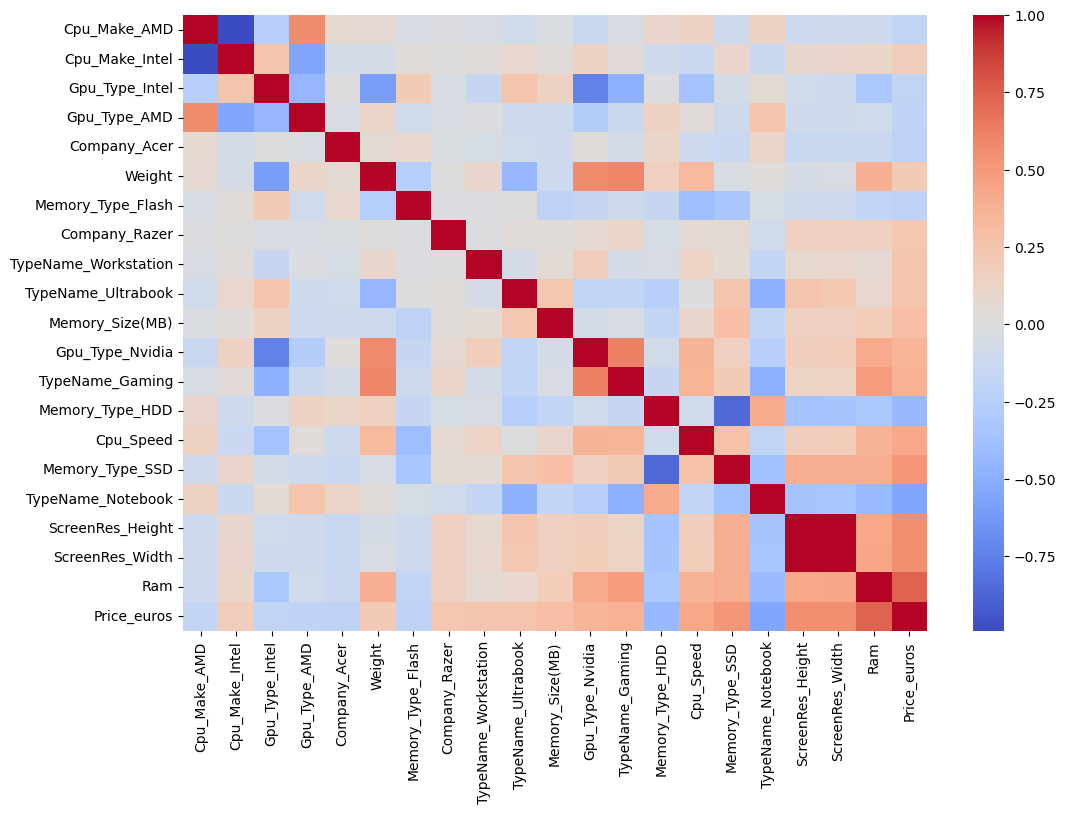

In [41]:
# We would plot the top correlated features
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(top_correlated_df.corr(), annot=False , cmap='coolwarm')

## 4. Choose and Train the Model

In [42]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = top_correlated_df.drop("Price_euros", axis = 1)
y = top_correlated_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Note: we could apply feature scaling if score is low

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

## 5. Make a prediction

In [43]:
y_preds = model.predict(X_test)
y_preds[:10]

array([1409.98721667,  301.56123333,  357.60113333, 1399.72766667,
        659.0496    , 1554.082925  , 1589.43009524,  937.238     ,
       1720.7206    ,  800.9036    ])

## 6. Evaluate the Model

In [44]:
model.score(X_test, y_test)

0.8078994412451659

Model has a good score which doesnt need much improvement, but we would do some hyper-parameter tuning by testing parameters.
#### Hyper-parameter Tuning

In [45]:
# Testing different n_estimators, we could use GridSearchCV if we feel we are not satisfied with the scores below.
for i in range(10,200,20):
    model = RandomForestRegressor(n_estimators =i).fit(X_train, y_train)
    print(f"Estimators: {i} - Score: {model.score(X_test, y_test)*100:.1f}%")

Estimators: 10 - Score: 79.0%
Estimators: 30 - Score: 81.5%
Estimators: 50 - Score: 81.1%
Estimators: 70 - Score: 81.3%
Estimators: 90 - Score: 81.9%
Estimators: 110 - Score: 82.1%
Estimators: 130 - Score: 81.6%
Estimators: 150 - Score: 81.4%
Estimators: 170 - Score: 81.6%
Estimators: 190 - Score: 82.0%


## 7. Plot the Data

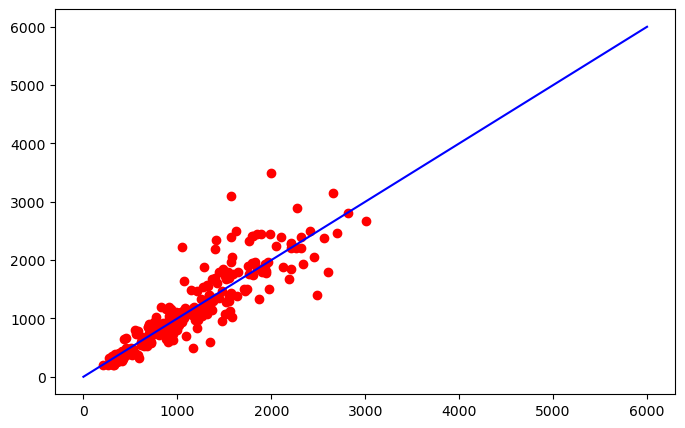

In [46]:
# plot predicted data vs test data
plt.figure(figsize=(8,5))
plt.scatter(y_preds, y_test, color="red")
plt.plot(range(0,6000), range(0,6000), color="blue")

We are see that we have only few outliers, the predictions is close the line

## 8. Save the Model

In [47]:
# using pickle
import pickle

pickle.dump(model, open("model/laptop-price-predict.pk1","wb"))

## 9. Feature Importance

Feature importance is used to see which features the model feels are more important than others

In [48]:
# Feature importance values
feature_importances = model.feature_importances_
feature_importances

array([0.00185001, 0.00186547, 0.00462384, 0.00445722, 0.00235806,
       0.12441071, 0.00134357, 0.01725358, 0.02521815, 0.00478874,
       0.02716661, 0.00328703, 0.0023026 , 0.00431527, 0.08908681,
       0.00816153, 0.04603826, 0.01879923, 0.01954432, 0.59312898])

In [49]:
feature_names = list(X_train.columns)

In [50]:
# We want to get the top 10 features by importances
featured_importance_df = pd.DataFrame({'Features':feature_names, 'Importances':feature_importances})
featured_importance_df = featured_importance_df.sort_values(by='Importances', ascending=False)
featured_importance_df

,Features,Importances
19,Ram,0.593129
5,Weight,0.124411
14,Cpu_Speed,0.089087
16,TypeName_Notebook,0.046038
10,Memory_Size(MB),0.027167
8,TypeName_Workstation,0.025218
18,ScreenRes_Width,0.019544
17,ScreenRes_Height,0.018799
7,Company_Razer,0.017254
15,Memory_Type_SSD,0.008162


#### We can see that Ram, CPU_Speed, and Weight of the laptop are top determinants for the Price of the laptop